# WSI
## Raport z ćwiczenia laboratoryjnego nr 4
### Jan Kuc, 303753

### 1. Cel eksperymentów

Zadanie polega na implementacji drzew decyzyjnych tworzonych algorytmem ID3 z ograniczeniem maksymalnej głębokości drzewa, a następnie stworzeniu klasyfikatora i zbadaniu jego jakości dla zbioru danych *Cardio Vascular Disease Detection* w zalezności od parametru maksymalnej głębokości drzewa.

### 2. Opis eksperymentów i decyzje projektowe

Zgodnie z poleceniem zadania, dane w kolumnach zbioru danych o nazwach:
- *age*
- *weight*
- *height*
- *ap-hi* (ciśnienie skurczowe)
- *ap-lo* (ciśnienie rozkurczowe)
nalezało zdeyskretyzować. Dyskretyzacja nie była narzucona, więc zdecydowano się na wybór następujących przedziałów do podzielenia wartości kolejnych atrybutów na dyskretne kategorie:

| atrybut | - | - | - | - | - | - | - | - | - | - |
|-------|--------|------|----|-----|------|-------|-------|------|-----|----|
| age (lata) | -inf | 20 | 30 | 40 | 50 | 55 | 60 | 65 | 70 | inf |
| weight (kg) | -inf | 50 | 70 | 90 | 110 | 130 | inf |
| height (cm) | -inf | 120 | 150 | 170 | 190 | 205 | inf |
| ap_hi (mmHg) | -inf | 120 | 130 | 140 | 160 | 180 | inf|
| ap_lo (mmHg) | -inf | 80 | 85 | 90 | 100 | 110 | inf|


Do przeprowadzenia testów budowanego klasyfikatora niezbędne jest odpowiednie przygotowanie wykorzystywanego zbioru danych i w tym celu przechodzi on przez następujące kroki:
1. Dyskretyzacja odpowiednich kolumn
2. Znalezienie wierszy z brakującymi wartościami i usunięcie ich
3. Podział danych na zbiory: treningowy, walidacyjny i testowy, w stosunku 60% : 20% : 20%

Parametrem przyjmowanym przez stworzony solver jest **max_depth**, oznaczający maksymalną głębokość drzewa w uruchamianym algorytmie. Największą wartością tego parametru moze być liczba atrybutów w zbiorze danych, poniewaz w danym poddrzewie bezsensowne jest podejmowanie kolejnych decyzji na podstawie atrybutu wykorzystanego juz wcześniej.

W celu wyłonienia parametru **max_depth** dającego najlepszą jakość klasyfikatora zaplanowano eksperymenty, polegające na uruchomieniu solvera dla kazdej z głebokości, dla 10 róznych, losowych podziałów zbioru danych na podzbiory, a następnie ewaluacji modelu i zapisaniu jego średniej wartości dokładności (accuracy) z tych 10 uruchomień dla danego parametru max_depth, zarówno dla zbioru treningowego jak i walidacyjnego.

Przebieg zmian *accuracy* w zalezności od głębokości i podzbioru zostanie przedstawiony na wykresie.

Następnie wybrany model zostanie sprawdzony na danych testowych.

### 3. Oczekiwane rezultaty

Dokładność klasyfikacji w badanym przypadku będzie zalezeć nie tylko od jakości klasyfikatora, ale tez od przyjętego podziału wartości wybranych atrybutów na zakresy w procesie dyskretyzacji danych.
Zakresy dobrano na podstawie informacji dostępnych w internecie, takich jak: kategoryzacja ciśnienia skurczowego i rozkurczowego, szansa na zachorowalność wzrastająca wraz z wiekiem itd. W zbiorze danych dla niemalze kazdego atrybutu występują pojedyncze wartosci odchylające się znacząco od reszty.

Mimo wszystko, spodziewanym zachowaniem stworzonego klasyfikatora, jest uzyskiwanie lepszej jakości klasyfikacji na danych treningowych, dla większych wartości parametru maksymalnej głębokości drzewa, poniewaz algorytm ID3 przeszukuje wtedy więcej gałęzi drzewa, a jeśli głębokość nie pozwoli na dalsze rozwijanie poddrzewa, w miejsce nieznanej klasy (dla konkretnej wartości danego atrybutu) podstawiana jest najczęściej powtarzana klasa w pozostałym na aktualnym etapie zbiorze danych.

Z drugiej strony, dla zbyt duzych wartości **max_depth** mozemy mieć do czynienia z nadmiernym dopasowaniem modelu do danych treningowych, co objawia się wyraźną róznicą między dokłanościami uzyskanymi na zbiorze treningowym i walidacyjnym, co nie jest efektem poządanym.

Podsumowując, oczekiwana najlepsza maksymalna głębokość dla badanego klasyfikatora powinna być kompromisem pomiędzy mozliwością przeszukania jak największej liczby gałęzi a nadmiernym dopasowaniem do zbioru treningowego.

### 4. Eksperymenty

In [10]:
import sys
sys.path.append('../src/')
from my_solver import ID3Tree
from process_data import process_data, dataset_split
from copy import deepcopy
from math import inf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# give an absolute path to file with dataset
FILENAME = '/Users/janekkuc/Desktop/PW/Sem7/WSI/wsi22Z-kuc/lab4/data/cardio_train.csv'

In [12]:
non_discrete_attrs = {'age': [-inf, 7300, 10950, 14600, 18250, 20075, 21900, 23725, 25550, inf],
                    'weight': [-inf, 50, 70, 90, 110, 130, inf],
                    'height': [-inf, 120, 150, 170, 190, 205, inf],
                    'ap_hi': [-inf, 120, 130, 140, 160, 180, inf],
                    'ap_lo': [-inf, 80, 85, 90, 100, 110, inf]}

In [13]:
label = 'cardio'

[[<AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'gender'}>
  <AxesSubplot:title={'center':'height'}>]
 [<AxesSubplot:title={'center':'weight'}>
  <AxesSubplot:title={'center':'ap_hi'}>
  <AxesSubplot:title={'center':'ap_lo'}>]
 [<AxesSubplot:title={'center':'cholesterol'}>
  <AxesSubplot:title={'center':'gluc'}>
  <AxesSubplot:title={'center':'smoke'}>]
 [<AxesSubplot:title={'center':'alco'}>
  <AxesSubplot:title={'center':'active'}>
  <AxesSubplot:title={'center':'cardio'}>]]
             Missing Values  % of Total Values
age                       0                0.0
gender                    0                0.0
height                    0                0.0
weight                    0                0.0
ap_hi                     0                0.0
ap_lo                     0                0.0
cholesterol               0                0.0
gluc                      0                0.0
smoke                     0                0.0
alco                      

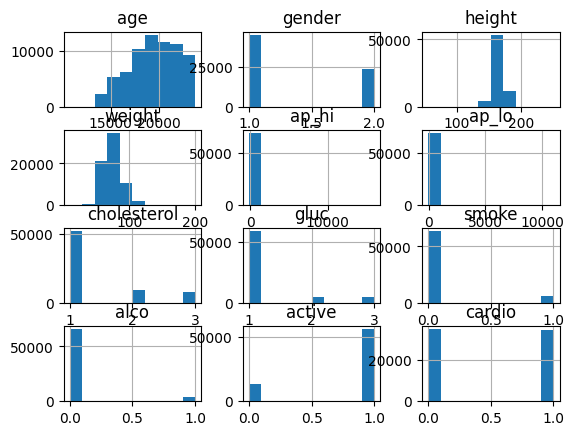

In [14]:
dataset = process_data(FILENAME, non_discrete_attrs)

In [15]:
DEPTHS = range(1,12)
SPLITS = 10

In [16]:
save_params = []
accs_train = np.zeros((SPLITS, len(DEPTHS)))
accs_valid = np.zeros((SPLITS, len(DEPTHS)))

In [17]:
for i in range(SPLITS):
  train_data_X, train_data_y, valid_data_X, valid_data_y, test_data_X, test_data_y = dataset_split(dataset, label)
  for j in range(len(DEPTHS)):
    depth = DEPTHS[j]
    print(f'Split nr: {i}, depth={depth}:')
    decision_tree = ID3Tree(max_depth=depth)
    
    decision_tree.fit(X=train_data_X, y=train_data_y, label=label)
    
    accuracy_train = decision_tree.evaluate(X=train_data_X, y=train_data_y, tree_copy=deepcopy(decision_tree.tree))
    accs_train[i,j] = accuracy_train
    print(f'Accuracy train: {accuracy_train}')
    
    accuracy_valid = decision_tree.evaluate(X=valid_data_X, y=valid_data_y, tree_copy=deepcopy(decision_tree.tree))
    accs_valid[i,j] = accuracy_valid
    print(f'Accuracy valid: {accuracy_valid}')
    print('------------')
    
    save_params.append(decision_tree.get_parameters())

Split nr: 0, depth=1:
Accuracy train: 0.7134439634439634
Accuracy valid: 0.7117604617604618
------------
Split nr: 0, depth=2:
Accuracy train: 0.7180615680615681
Accuracy valid: 0.7168109668109668
------------
Split nr: 0, depth=3:
Accuracy train: 0.7273208273208274
Accuracy valid: 0.724025974025974
------------
Split nr: 0, depth=4:
Accuracy train: 0.7349446849446849
Accuracy valid: 0.7222222222222222
------------
Split nr: 0, depth=5:
Accuracy train: 0.7410774410774411
Accuracy valid: 0.7222943722943723
------------
Split nr: 0, depth=6:
Accuracy train: 0.7509620009620009
Accuracy valid: 0.7161616161616161
------------
Split nr: 0, depth=7:
Accuracy train: 0.762987012987013
Accuracy valid: 0.7119047619047619
------------
Split nr: 0, depth=8:
Accuracy train: 0.7732082732082732
Accuracy valid: 0.704040404040404
------------
Split nr: 0, depth=9:
Accuracy train: 0.7812169312169313
Accuracy valid: 0.7003607503607504
------------
Split nr: 0, depth=10:
Accuracy train: 0.786050986050986
A

In [21]:
mean_accs_train = []
mean_accs_valid = []
for i in range(accs_train.shape[1]):
  mean_accs_train.append(np.mean(accs_train[:, i]))
  mean_accs_valid.append(np.mean(accs_valid[:, i]))

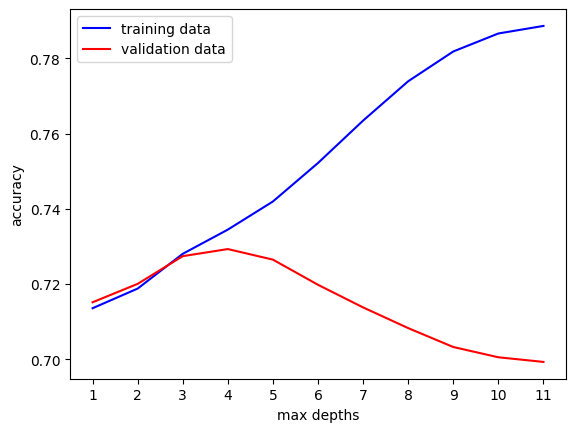

In [19]:
plt.figure()
plt.plot(DEPTHS, mean_accs_train, 'b', label='training data')
plt.plot(DEPTHS, mean_accs_valid, 'r', label='validation data')
plt.legend(loc='upper left')
plt.xlabel('max depths')
plt.ylabel('accuracy')
plt.xticks(DEPTHS)
plt.show()

### 5. Wnioski

Na wykresie powyzej, prezentującym zmiany dokładności klasyfikacji modelu na danych treningowych i walidacyjnych, widać, ze rzeczywiście jakość na zbiorze treningowym rośnie wraz z parametrem maksymalnej głębokości przeszukiwania, lecz wtedy maleje dokładność na zbiorze walidacyjnym, a więc zauwazalne jest niepoządane zjawisko *overfitting'u*.

Ostateczny wybór głębokości drzewa do finalnego modelu powinien być kompromisem pomiędzy wartością *accuracy* a wielkością róznicy w precyzji dla obu zbiorów. Na wykresie widać, ze do **max_depth = 4** precyzja na obu zbiorach rośnie, dla **max_depth > 4** wartości accuracy rozjezdzają się, tak więc najlepszą jakość modelu uzyskano dla parametru maksymalnej głębokości drzewa równej **4**.

### 6. Ocena wybranego modelu na zbiorze testowym

In [26]:
accs = []

for i in range(SPLITS):
  train_data_X, train_data_y, valid_data_X, valid_data_y, test_data_X, test_data_y = dataset_split(dataset, label)

  decision_tree = ID3Tree(max_depth=4)

  decision_tree.fit(X=train_data_X, y=train_data_y, label=label)
      
  accuracy = decision_tree.evaluate(X=test_data_X, y=test_data_y, tree_copy=deepcopy(decision_tree.tree))

  print(f'Model accuracy: {accuracy}')
  print('-------------'*3)
  
  accs.append(accuracy)
  
print(f'\nMean accuracy: {np.mean(accs)}')

Model accuracy: 0.7230358559988457
---------------------------------------
Model accuracy: 0.7332082822307193
---------------------------------------
Model accuracy: 0.729673183752976
---------------------------------------
Model accuracy: 0.7317653848928649
---------------------------------------
Model accuracy: 0.7302503426881177
---------------------------------------
Model accuracy: 0.7233244354664166
---------------------------------------
Model accuracy: 0.7257052160738764
---------------------------------------
Model accuracy: 0.7304667772887959
---------------------------------------
Model accuracy: 0.725560926340091
---------------------------------------
Model accuracy: 0.7310439362239377
---------------------------------------

Mean accuracy: 0.7284034340956642


Ostatecznie, dla modelu uznanego za najlepszy, dla 10 treningów modeli na róznych podziałach danych, otrzymano średnią precyzję klasyfikacji ([liczba rekordów poprawnie sklasyfikowanych] / [ogólna liczba rekordów]) na poziomie **72,84%**.